# Ridge Regression Predict Renewable Energy

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import boxcox
from scipy.stats.mstats import winsorize
from scipy.stats import skew
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
raw_data = pd.read_csv('global-data-on-sustainable-energy (1).csv')

# Preprocessing

In [4]:
raw_data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [5]:
raw_data.describe(include = 'all')

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
count,3649,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,...,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3648,3.648000e+03,3648.000000,3648.000000
unique,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,124,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN
freq,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN
mean,NaN,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,...,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,NaN,6.332135e+05,18.246388,14.822695
std,NaN,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,...,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,NaN,1.585519e+06,24.159232,66.348148
min,NaN,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,NaN,2.100000e+01,-40.900557,-175.198242
25%,NaN,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,...,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,NaN,2.571300e+04,3.202778,-11.779889
50%,NaN,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,...,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,NaN,1.176000e+05,17.189877,19.145136
75%,NaN,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,...,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,NaN,5.131200e+05,38.969719,46.199616


In [6]:
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [7]:
data = raw_data.drop(['Land Area(Km2)', 'Latitude', 'Longitude'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [8]:
data.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [9]:
data.columns = data.columns.str.replace('\\n', '', regex=True).str.strip()

In [10]:
data['Density\\n(P/Km2)'] = pd.to_numeric(data['Density\\n(P/Km2)'], errors='coerce')
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Year'] = data['Year'].astype(int)

# Dealing with missing value with groupping by entity or country

In [14]:
mean_columns = ['Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)']
zero_columns = ['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Renewable energy share in the total final energy consumption (%)', 'Low-carbon electricity (% electricity)', 'Renewables (% equivalent primary energy)', 'Value_co2_emissions_kt_by_country', 'Financial flows to developing countries (US $)', 'Renewable-electricity-generating-capacity-per-capita'] 

data_filled = data.copy()
data_filled = data_filled.groupby('Entity').transform(lambda x: x.fillna(x.mean())).combine_first(data)

data_filled['Entity'] = data['Entity']
data_filled['Year'] = data['Year']

for col in mean_columns:
    if col in data_filled.columns:
        data_filled[col] = data_filled[col].fillna(data_filled[col].mean())

for col in zero_columns:
    if col in data_filled.columns:
        data_filled[col] = data_filled[col].fillna(0)

In [15]:
data_filled.isnull().sum()

Access to clean fuels for cooking                                   0
Access to electricity (% of population)                             0
Density\n(P/Km2)                                                    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Entity                                                              0
Financial flows to developing countries (US $)                      0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Renewable energy share in the total final energy consumption (%)    0
Renewable-electricity-generating-capacity-per-capita                0
Renewables (% equivalent primary energy)                            0
Value_co2_emissions_

In [16]:
data_filled.describe(include='all')

,Access to clean fuels for cooking,Access to electricity (% of population),Density\n(P/Km2),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Entity,Financial flows to developing countries (US $),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Renewable energy share in the total final energy consumption (%),Renewable-electricity-generating-capacity-per-capita,Renewables (% equivalent primary energy),Value_co2_emissions_kt_by_country,Year,gdp_growth,gdp_per_capita
count,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649,3.649000e+03,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3.649000e+03,3649.000000,3649.000000,3649.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,63.255287,78.770906,141.030483,69.960052,12.985755,23.830074,5.296939,NaN,4.928637e+07,36.377600,25743.981745,32.436139,84.271779,4.966813,1.481817e+05,2010.038367,3.456340,13286.914685
std,38.128550,30.410750,166.744428,347.089451,71.776775,104.145855,3.504766,NaN,2.022115e+08,34.341921,34773.221366,29.884712,216.416174,11.313904,7.447496e+05,6.054228,5.449718,19164.334828
min,0.000000,1.252269,2.000000,0.000000,0.000000,0.000000,0.110000,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2000.000000,-62.075920,111.927225
25%,25.900000,59.137558,34.000000,0.280000,0.000000,0.040000,3.170000,NaN,0.000000e+00,2.198241,3116.737300,6.290000,0.000000,0.000000,1.180000e+03,2005.000000,1.578533,1416.603810
50%,78.850000,98.264870,87.000000,2.940000,0.000000,1.420000,4.320000,NaN,1.224000e+06,26.824644,13120.570000,23.030000,7.890000,0.000000,8.250000e+03,2010.000000,3.456340,5213.795649
75%,100.000000,100.000000,203.000000,26.520000,0.000000,9.560000,6.000000,NaN,1.991538e+07,64.022670,33892.780000,54.800000,67.600000,4.291226,5.520000e+04,2015.000000,5.692842,14160.562000


# Exploring the PDFs

<Axes: xlabel='Renewable energy share in the total final energy consumption (%)', ylabel='Count'>

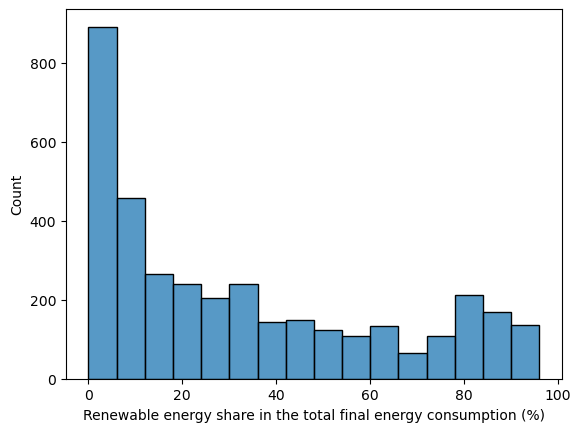

In [17]:
sns.histplot(data_filled['Renewable energy share in the total final energy consumption (%)'])

# Dealing with outlier

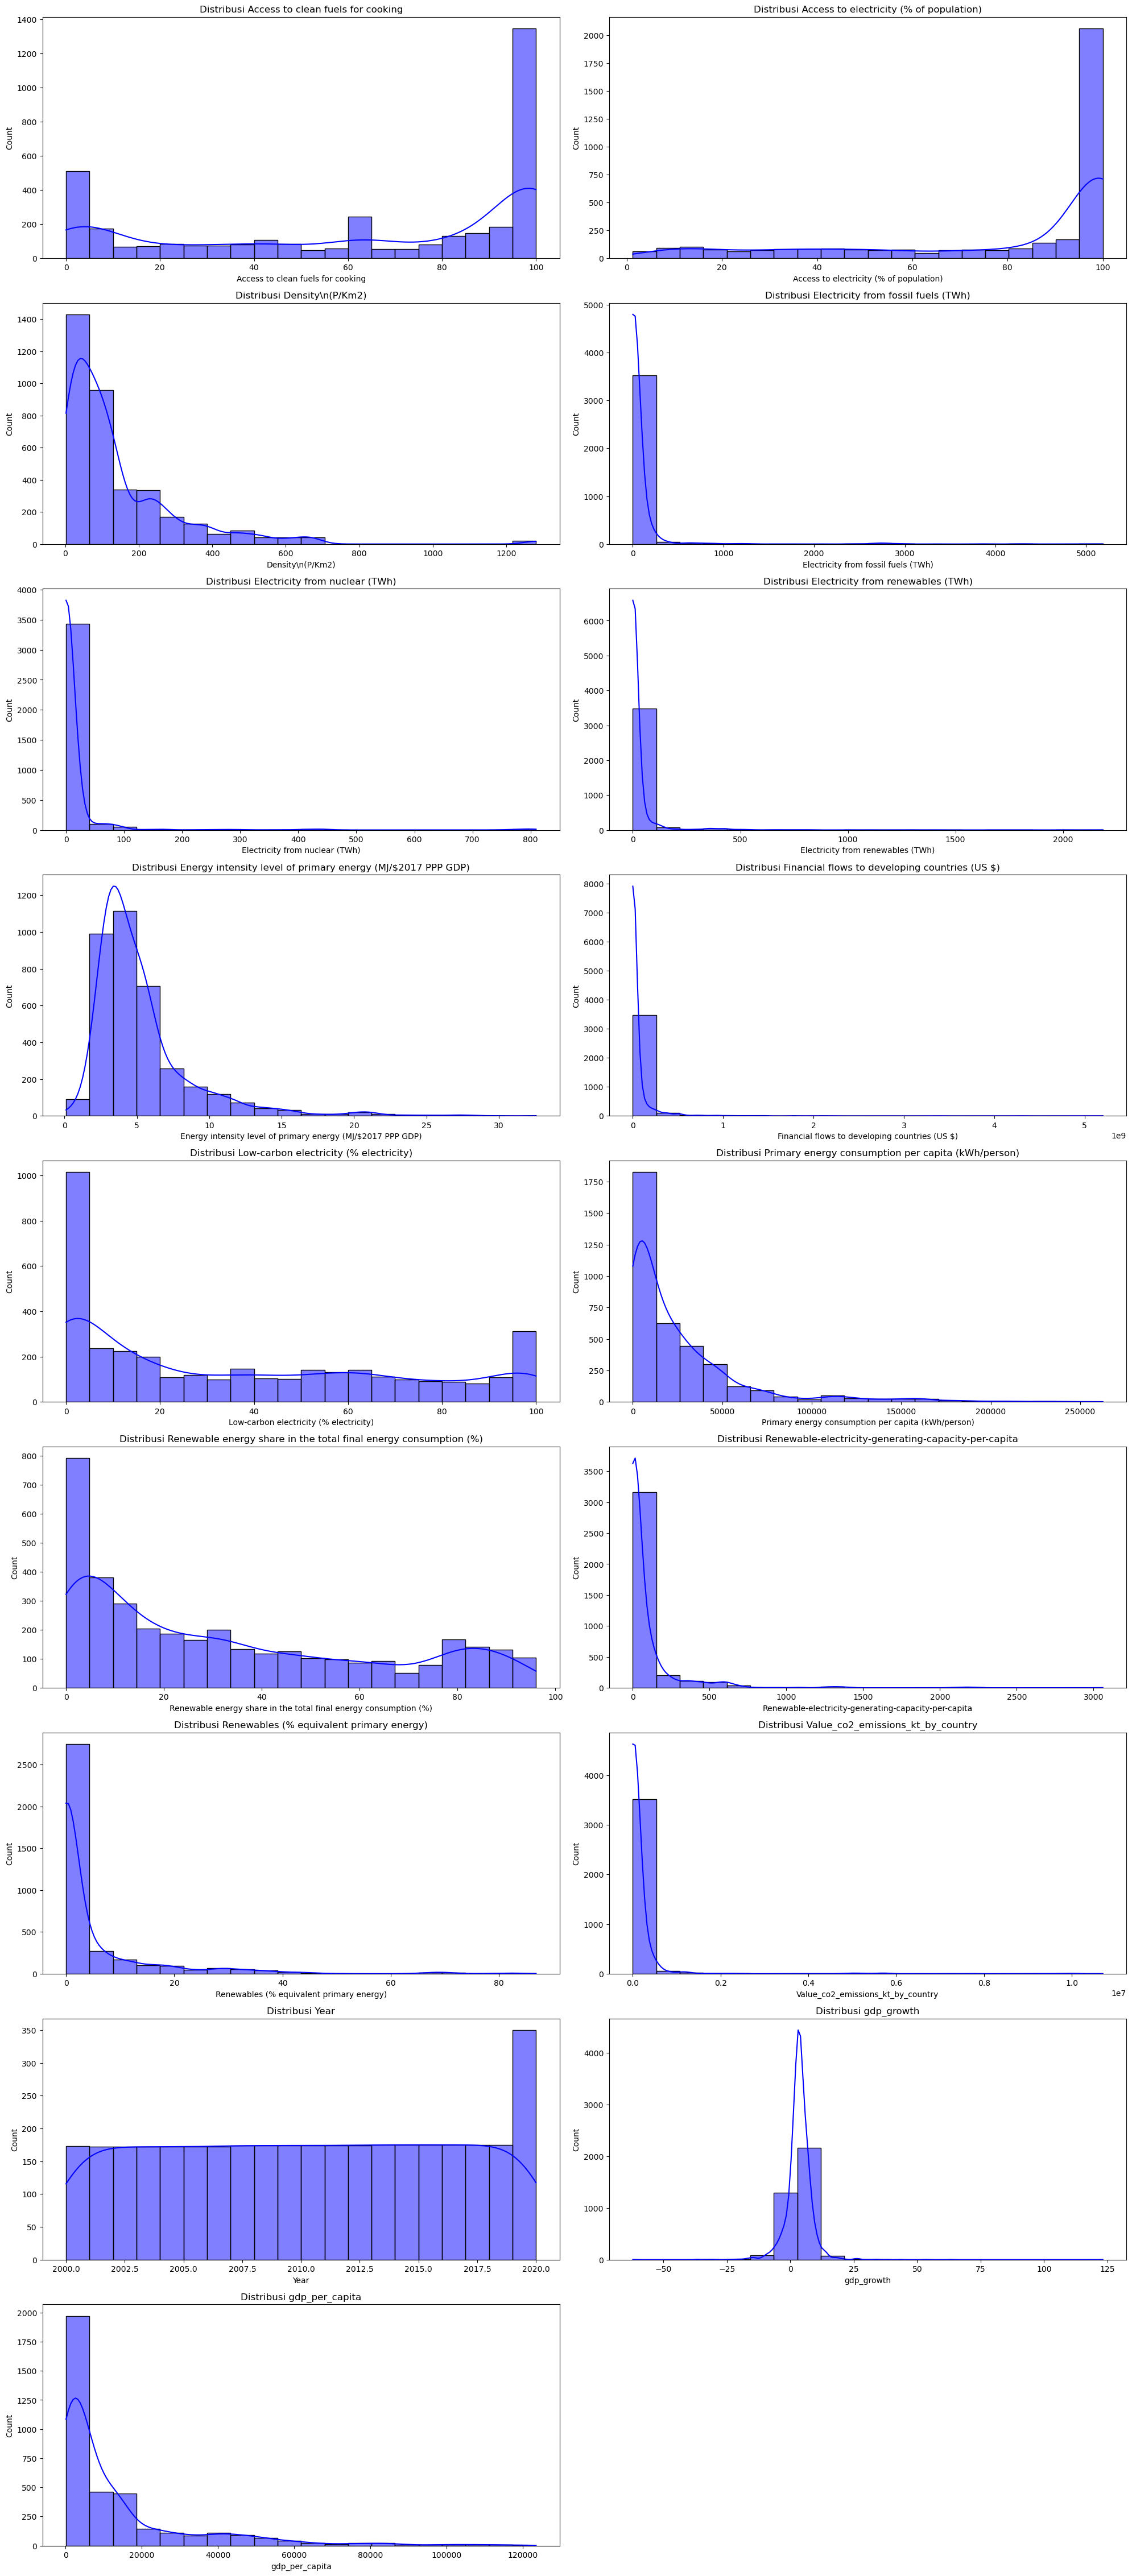

In [18]:
number_features = data_filled.select_dtypes(include=['number'])
plt.figure(figsize=(20, 50))
for i, column in enumerate(number_features.columns, 1):
    plt.subplot(10, 2, i)
    sns.histplot(data_filled[column], bins=20, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

In [39]:
arr_col = [
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)',
    'Financial flows to developing countries (US $)',
    'Primary energy consumption per capita (kWh/person)',
    'Renewable-electricity-generating-capacity-per-capita',
    'Renewables (% equivalent primary energy)',
    'Value_co2_emissions_kt_by_country',
    'gdp_growth',
    'gdp_per_capita'
]

boxcox_lambdas = {}
for col in arr_col:
    mask = data_filled[col] > 0
    transformed_values, fitted_lambda = boxcox(data_filled.loc[mask, col])
    data_filled.loc[mask, col] = transformed_values
    boxcox_lambdas[col] = fitted_lambda

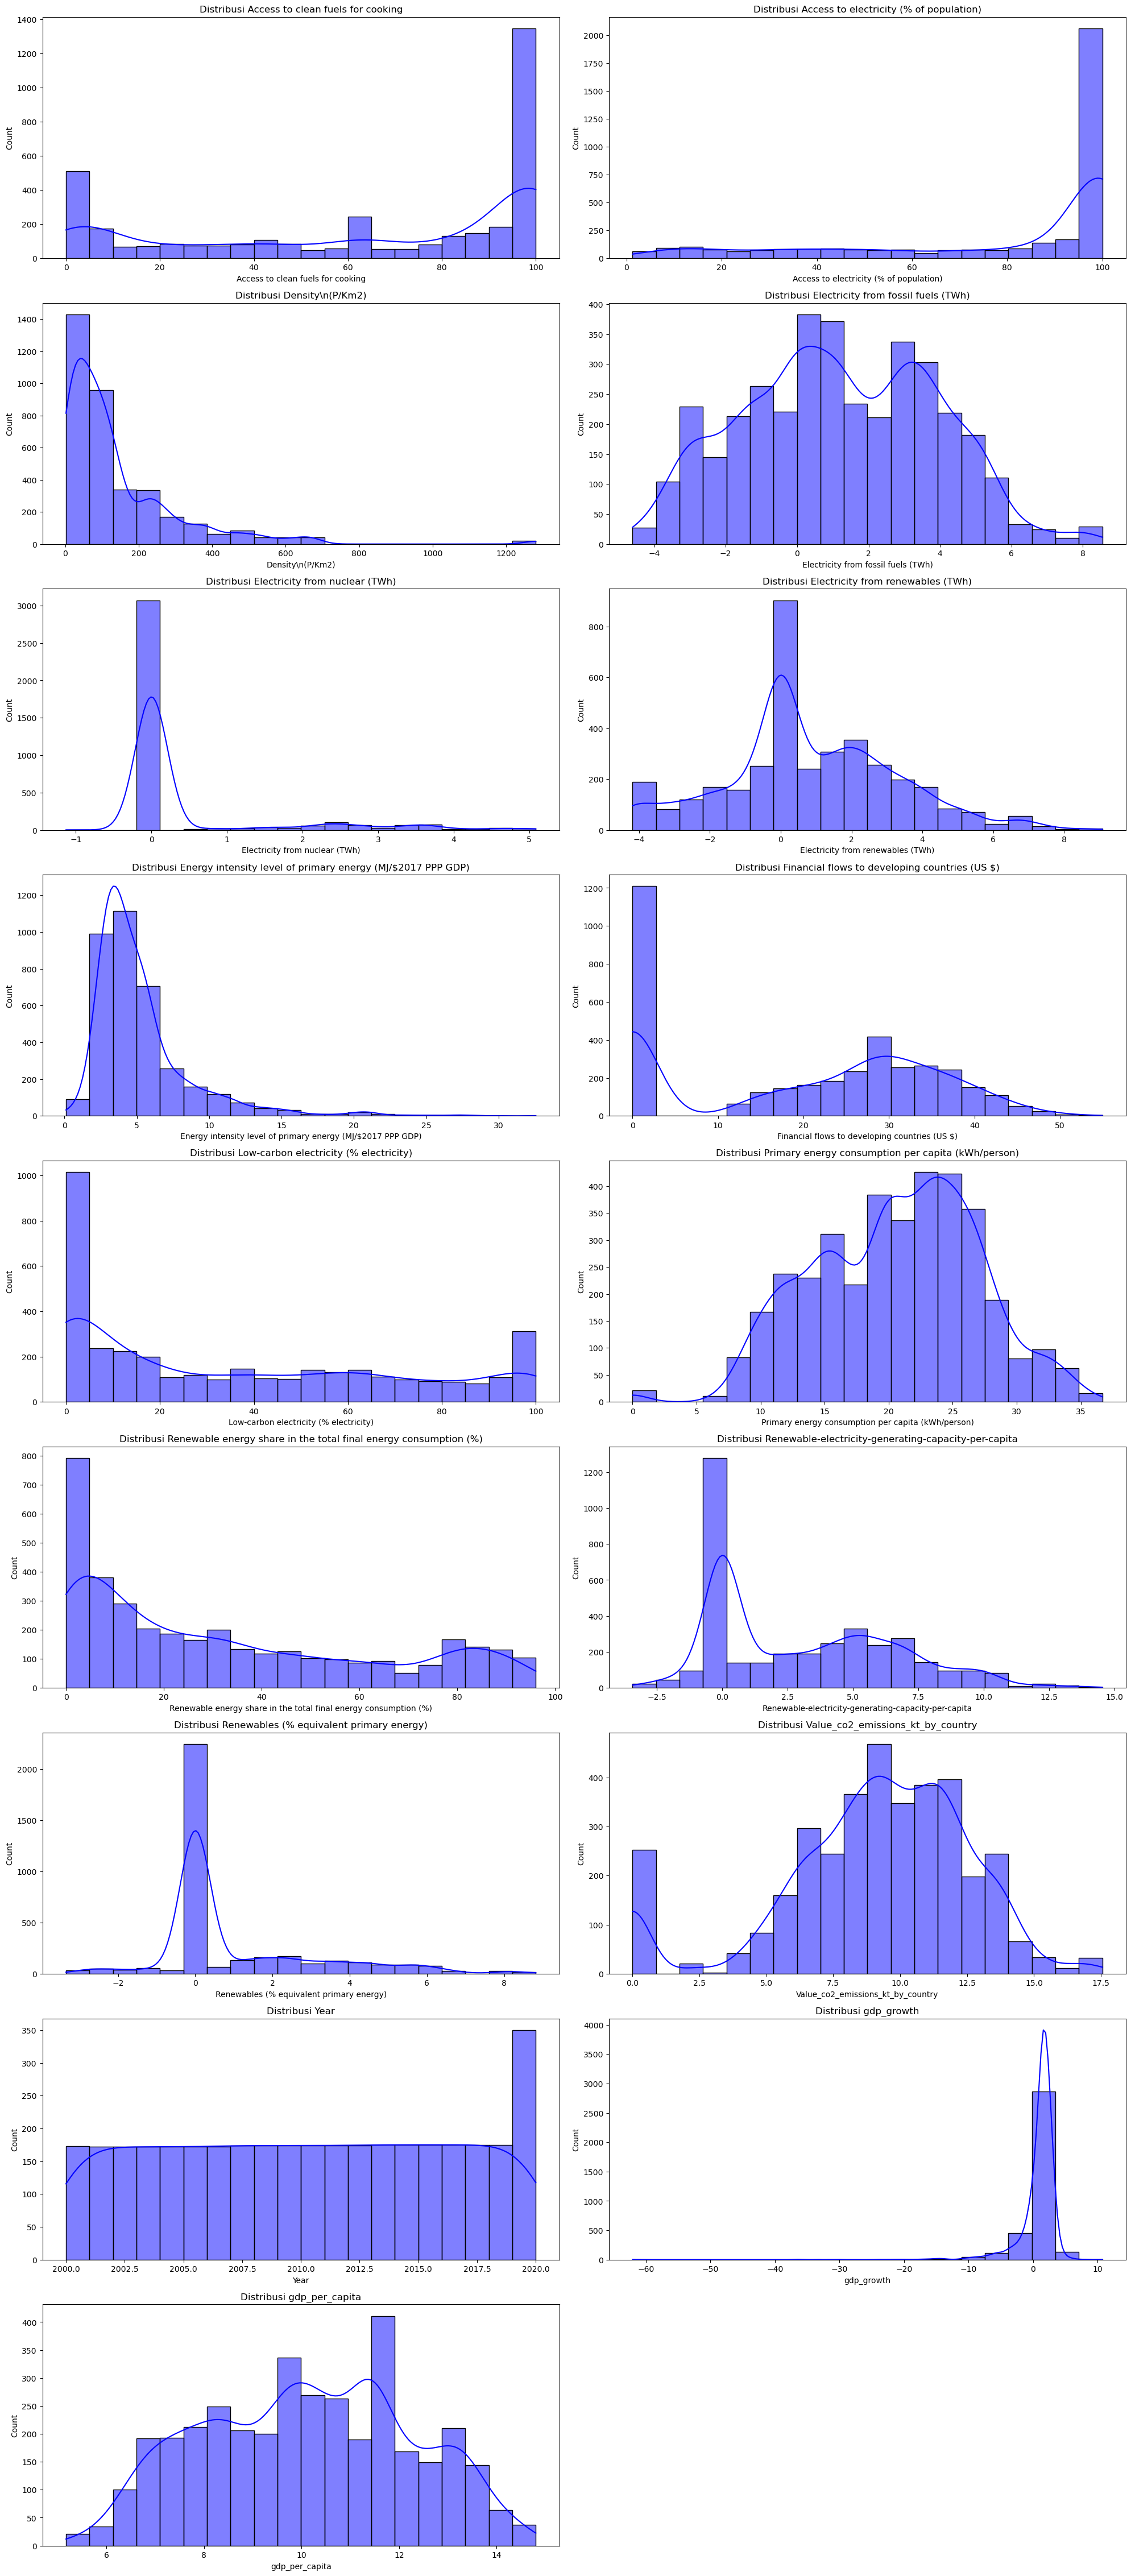

In [40]:
number_features = data_filled.select_dtypes(include=['number'])
plt.figure(figsize=(20, 50))
for i, column in enumerate(number_features.columns, 1):
    plt.subplot(10, 2, i)
    sns.histplot(data_filled[column], bins=20, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

In [19]:
data_filled.isnull().sum()

Access to clean fuels for cooking                                   0
Access to electricity (% of population)                             0
Density\n(P/Km2)                                                    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Entity                                                              0
Financial flows to developing countries (US $)                      0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Renewable energy share in the total final energy consumption (%)    0
Renewable-electricity-generating-capacity-per-capita                0
Renewables (% equivalent primary energy)                            0
Value_co2_emissions_

# Encoding Entity

In [20]:
data_encoded = pd.get_dummies(data_filled, columns=['Entity'], drop_first=True)

# Multicollinearity

In [21]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Columns: 192 entries, Access to clean fuels for cooking to Entity_Zimbabwe
dtypes: bool(175), float64(16), int64(1)
memory usage: 1.1 MB


In [22]:
data_encoded.columns.values

array(['Access to clean fuels for cooking',
       'Access to electricity (% of population)', 'Density\\n(P/Km2)',
       'Electricity from fossil fuels (TWh)',
       'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Financial flows to developing countries (US $)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Renewable energy share in the total final energy consumption (%)',
       'Renewable-electricity-generating-capacity-per-capita',
       'Renewables (% equivalent primary energy)',
       'Value_co2_emissions_kt_by_country', 'Year', 'gdp_growth',
       'gdp_per_capita', 'Entity_Albania', 'Entity_Algeria',
       'Entity_Angola', 'Entity_Antigua and Barbuda', 'Entity_Argentina',
       'Entity_Armenia', 'Entity_Aruba', 'Entity_Australia',
       'Entity_Austria', 'Entity_Azerbaijan', 'Entity_Bahamas',
  

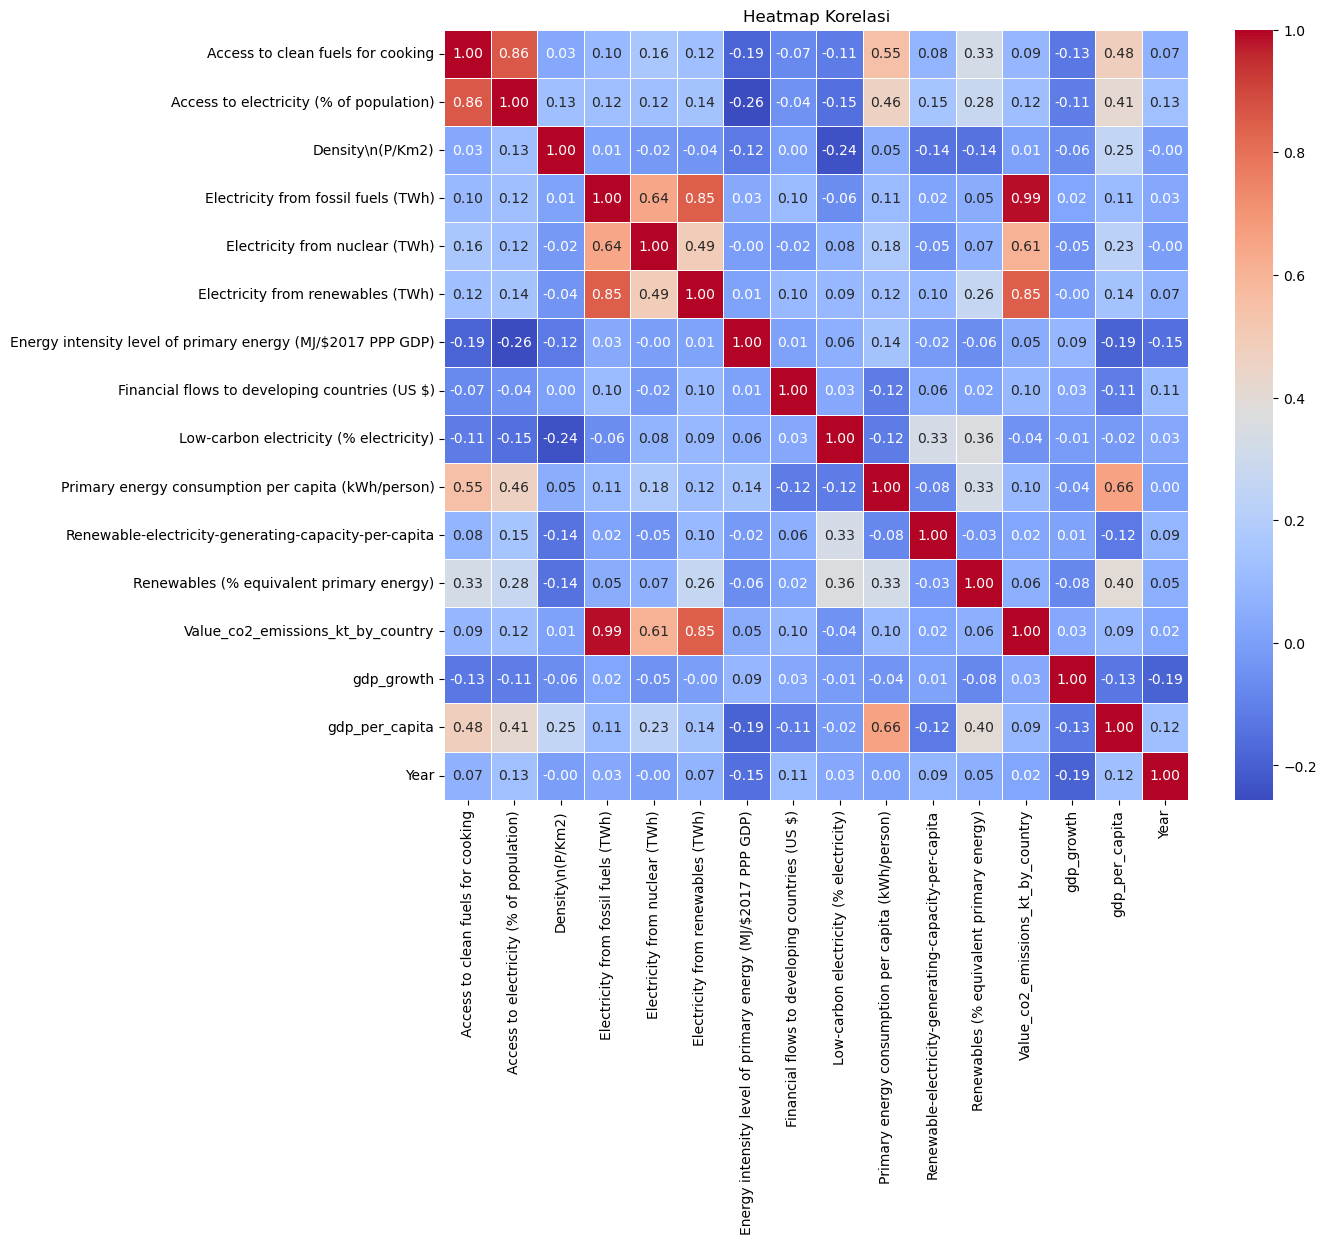

In [23]:
variables = data_encoded[[
    'Access to clean fuels for cooking',
    'Access to electricity (% of population)', 'Density\\n(P/Km2)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Financial flows to developing countries (US $)',
    
'Low-carbon electricity (% electricity)',
    'Primary energy consumption per capita (kWh/person)',
    'Renewable-electricity-generating-capacity-per-capita',
    'Renewables (% equivalent primary energy)',
    'Value_co2_emissions_kt_by_country', 'gdp_growth',
    'gdp_per_capita', 'Year'
]]
plt.figure(figsize=(12,10))
correlation_matrix = variables.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

In [24]:
vif = pd.DataFrame()
vif["Features"] = variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif

,Features,VIF
0,Access to clean fuels for cooking,17.236622
1,Access to electricity (% of population),34.233379
2,Density\n(P/Km2),2.216577
3,Electricity from fossil fuels (TWh),46.500671
4,Electricity from nuclear (TWh),2.163349
5,Electricity from renewables (TWh),4.871515
6,Energy intensity level of primary energy (MJ/$...,4.458531
7,Financial flows to developing countries (US $),1.114357
8,Low-carbon electricity (% electricity),3.613451
9,Primary energy consumption per capita (kWh/per...,4.042998


# Ridge Regression

In [25]:
data_encoded.head()

,Access to clean fuels for cooking,Access to electricity (% of population),Density\n(P/Km2),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Financial flows to developing countries (US $),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),...,Entity_Ukraine,Entity_United Arab Emirates,Entity_United Kingdom,Entity_United States,Entity_Uruguay,Entity_Uzbekistan,Entity_Vanuatu,Entity_Yemen,Entity_Zambia,Entity_Zimbabwe
0,6.2,1.613591,60.0,0.16,0.0,0.31,1.64,2.000000e+04,65.957440,302.59482,...,False,False,False,False,False,False,False,False,False,False
1,7.2,4.074574,60.0,0.09,0.0,0.50,1.74,1.300000e+05,84.745766,236.89185,...,False,False,False,False,False,False,False,False,False,False
2,8.2,9.409158,60.0,0.13,0.0,0.56,1.40,3.950000e+06,81.159424,210.86215,...,False,False,False,False,False,False,False,False,False,False
3,9.5,14.738506,60.0,0.31,0.0,0.63,1.40,2.597000e+07,67.021280,229.96822,...,False,False,False,False,False,False,False,False,False,False
4,10.9,20.064968,60.0,0.33,0.0,0.56,1.20,3.296947e+07,62.921350,204.23125,...,False,False,False,False,False,False,False,False,False,False


# Declare the inputs and the targets

In [26]:
targets = data_encoded['Renewable energy share in the total final energy consumption (%)']

inputs = data_encoded.drop(['Renewable energy share in the total final energy consumption (%)'],axis=1)

# Train test split

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape)

(2919, 191) (730, 191)


# Create the Regression

In [29]:
reg = Ridge()
reg.fit(x_train,y_train)

Ridge()

# Cross Validation

In [30]:
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

ridge_cv_model = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv_model.fit(x_train, y_train)

print(f"Optimal lambda: {ridge_cv_model.alpha_}")

Optimal lambda: 0.01


C:\Users\Tanishka Bhojne\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [32]:
y_hat_train = ridge_cv_model.predict(x_train)

mse = mean_squared_error(y_train, y_hat_train)
rmse = mse ** 0.5
mae = mean_absolute_error(y_train, y_hat_train)
r2 = r2_score(y_train, y_hat_train)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MSE: 904747634196150.8
RMSE: 30079023.158941694
MAE: 10875978.601683807
R-squared: -1010108461645.533


# Evaluating Model Performance

In [33]:
y_predict = ridge_cv_model.predict(x_test)

mse = mean_squared_error(y_test, y_predict)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

MSE: 593445812487462.2
RMSE: 24360743.26631809
MAE: 9900410.970289372
R-squared: -674154022214.4598


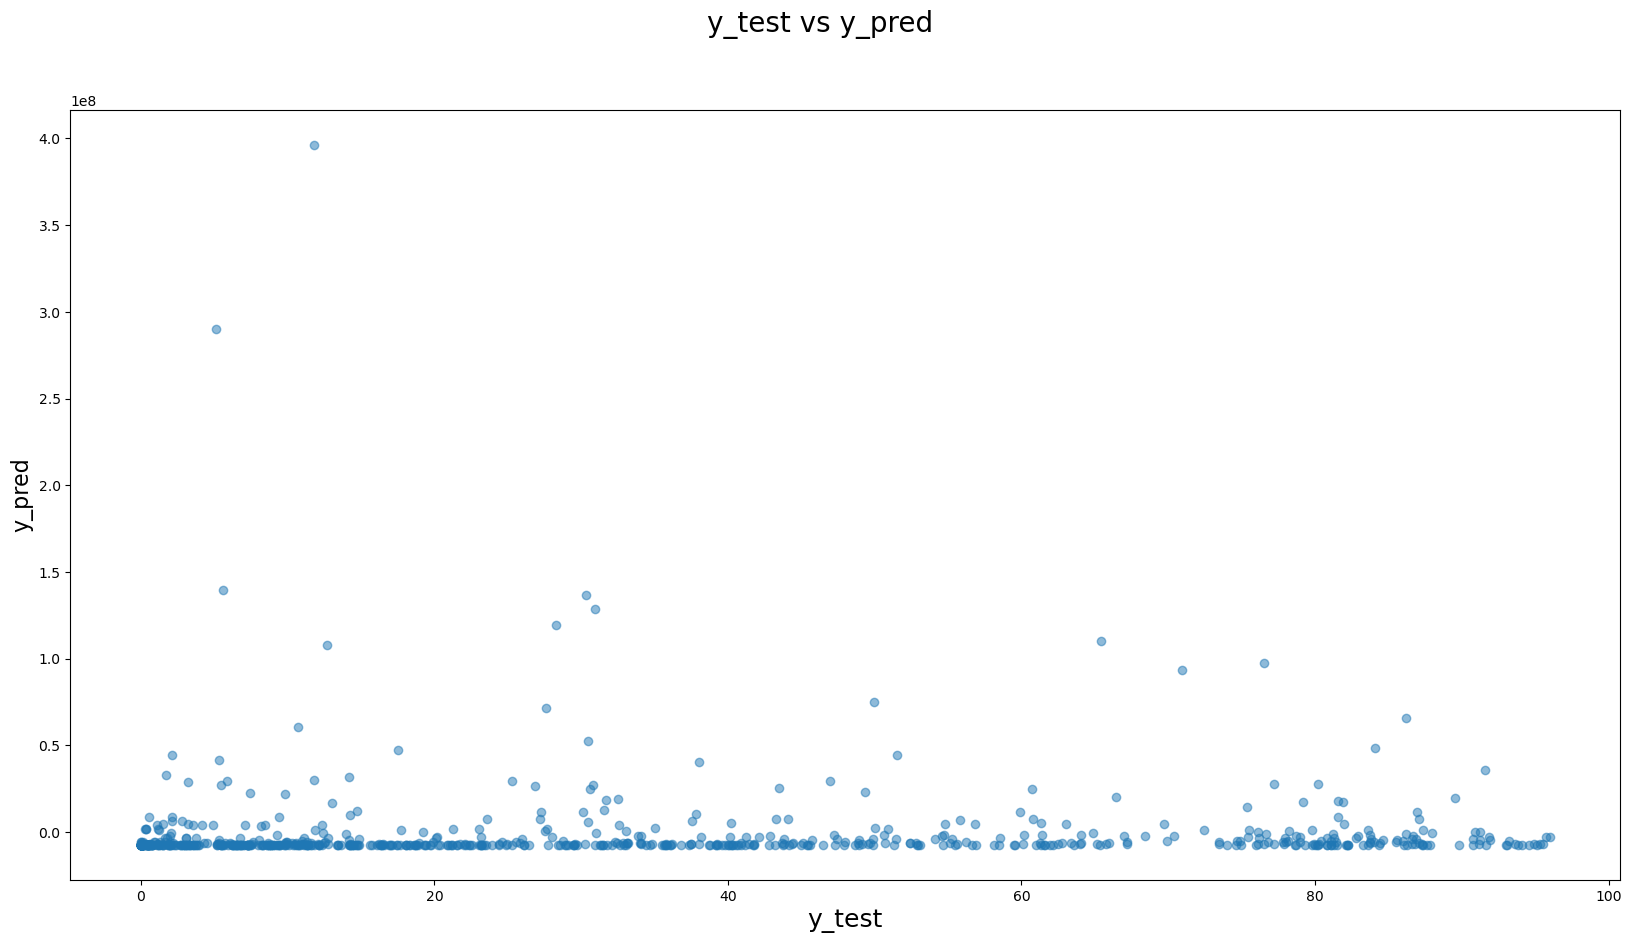

In [34]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(y_test, y_predict, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

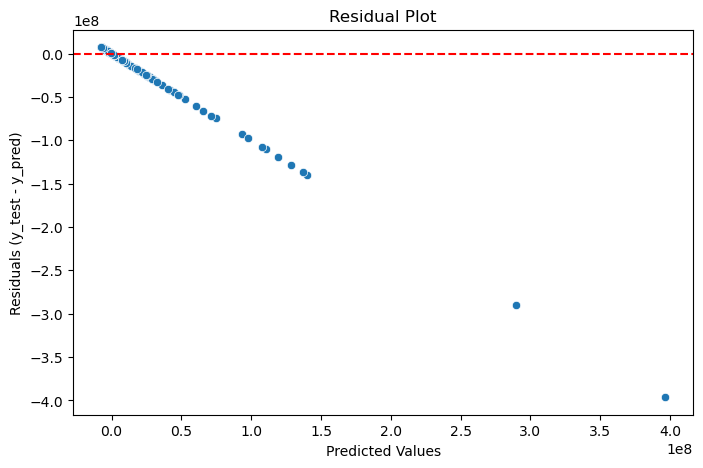

In [35]:
residuals = y_test - y_predict

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_predict, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y_test - y_pred)")
plt.title("Residual Plot")
plt.show()

C:\Users\Tanishka Bhojne\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
C:\Users\Tanishka Bhojne\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
C:\Users\Tanishka Bhojne\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
C:\Users\Tanishka Bhojne\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
C:\Users\Tanishka Bhojne\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:

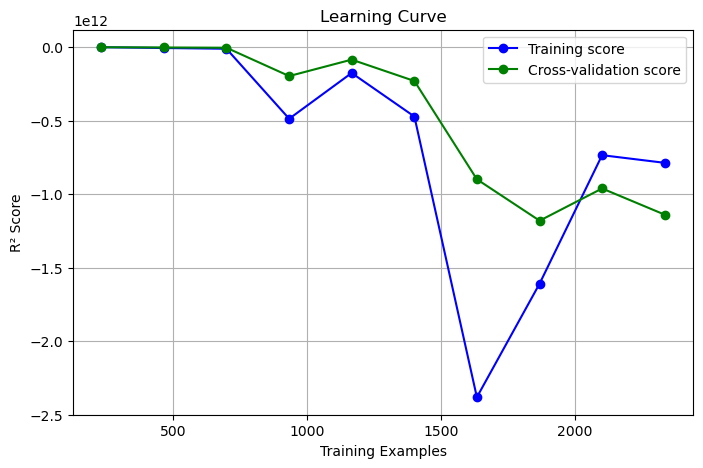

In [36]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    ridge_cv_model, x_train, y_train,
    cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('R² Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [37]:
df = pd.DataFrame({'Actual': y_test, 'Predictions': y_predict})
df['Predictions']= round(df['Predictions'], 2)
df.head()

,Actual,Predictions
1406,65.44,1.103896e+08
3598,1.08,4.134628e+06
3646,80.23,-7.295111e+06
3230,64.07,-1.732010e+06
3114,14.79,-7.296391e+06


# Deep Network for Regression

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import f_regression

ModuleNotFoundError: No module named 'tensorflow'